# Carnegie Mellon University



### Changing the author field and file name.

 (a) Change the `name:` field on the Jupyter Notebook from Your Name Here to your own name.

 (b) Rename this file to "Homework1_F21_YourHameHere.ipynb", where YourNameHere is changed to your own name.


For this problem we’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations)
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)


In [2]:
# All the libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

---

### 1. Data pre-processing [8 pts]
Let's start by loading and pre-processing our dataset.

**1)a) Load the `bikes` dataset into a dataframe called `bikes`, and print the first five rows.** [1pt]

In [3]:
bikes = pd.read_csv("daily_citi_bike_trip_counts_and_weather.csv")
bikes.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,False,False
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True


**1)b) Check that there are no missing values in your dataset. If they are, take care of them appropriately.** [1pt]


In [5]:
print(bikes.info())
print("Number of Missing Values: %1.0f"%bikes.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trips                852 non-null    int64  
 1   precipitation        852 non-null    float64
 2   snow_depth           852 non-null    float64
 3   snowfall             852 non-null    float64
 4   max_temperature      852 non-null    float64
 5   min_temperature      852 non-null    float64
 6   average_wind_speed   849 non-null    float64
 7   year                 852 non-null    int64  
 8   season               852 non-null    object 
 9   month                852 non-null    int64  
 10  holiday              852 non-null    bool   
 11  stations_in_service  852 non-null    int64  
 12  weekday              852 non-null    bool   
 13  weekday_non_holiday  852 non-null    bool   
dtypes: bool(3), float64(6), int64(4), object(1)
memory usage: 75.8+ KB
None
Number of Missing 

In [6]:
bikes = bikes.dropna(axis=1)
print("Number of Missing Values: %1.0f"%bikes.isnull().sum().sum())
bikes.head()

Number of Missing Values: 0


,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,2013,summer,8,False,329,True,True
2,29540,0.059055,0.0,0.0,78.08,68.00,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,2013,summer,8,False,329,False,False
4,36776,0.000000,0.0,0.0,78.08,62.06,2013,summer,8,False,329,True,True


**1)c) Separate your dataset into two dataframe. One dataframe should contain the data for weekends and the other one for weekdays.** [2pt]

In [7]:
bikes_weekends = bikes[bikes["weekday"]==False]
bikes_weekdays = bikes[bikes["weekday"]==True]

print("Rows in weekends: " )
print(bikes_weekends.shape)
print("------------\n Rows in weekdays: " )
print(bikes_weekdays.shape)

Rows in weekends: 
(244, 13)
------------
 Rows in weekdays: 
(608, 13)


**1)d) Let's look at the number of bicycle rental (trips) per season! Draw a boxplot that displays this information for the whole dataset. As subplots, draw the boxplots for weekdays and weekends. Is there a differece in the distribution of trips between seasons? Is there a difference between weekdays and weekends? Explain.** [4pts]

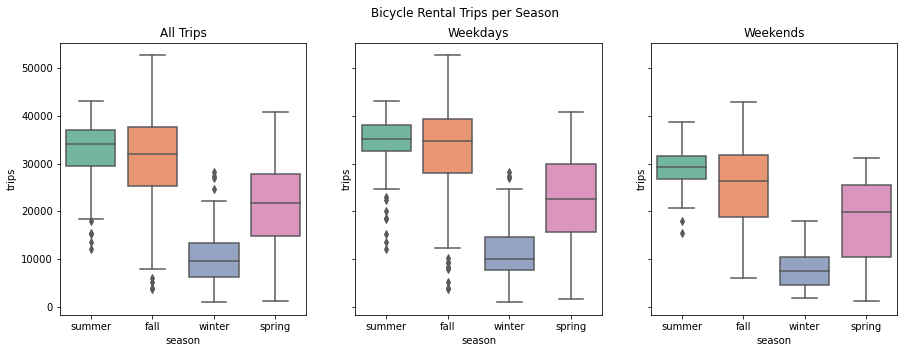

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Bicycle Rental Trips per Season')

# All
sns.boxplot(x="season", y="trips", data = bikes, palette = "Set2", ax=axes[0])
axes[0].set_title("All Trips")

# Weekdays
sns.boxplot(x="season", y="trips", data = bikes_weekdays, palette = "Set2", ax=axes[1])
axes[1].set_title("Weekdays")

# Weekends
sns.boxplot(x="season", y="trips", data = bikes_weekends, palette = "Set2", ax=axes[2])
axes[2].set_title("Weekends");

1)Between Seasons: There is substantial difference in # of trips for all seasons. Fall has most trips, followed by summer, spring and winter respectively

2)Between Weekend and Weekdays: Trips are more during weekday than weekend. In both case fall has most trips, closely followed by summer and then spring and winter. Threre is also more varaiance in the spread of trips during fall and winter season on weekends as compared to weekdays  

Overall we can say that in all cases the number of trips are most in fall and summer since the weather is pleasnt for bike rides. The trips reduce in spring and are least in winter as it might be too cold to ride the bike.

---

## Problem 2: Qualitative predictors [9 pts]

> The Season variable is an example of what’s called a categorical predictor. This problem gets to fit a model with a qualitative predictor and to interpret the findings.

**2)a) Fit a linear regression model with trips as the response variable and season as your predictor, and print the summary of this linear regression model. Use your weekdays dataset.** [2pt]


In [9]:
import statsmodels.formula.api as smf
import statsmodels.api as sm



In [10]:
reg_weekdays = smf.ols('trips ~ season', bikes_weekdays).fit()
reg_weekdays.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     261.4
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          1.07e-108
Time:                        14:35:31   Log-Likelihood:                -6333.7
No. Observations:                 608   AIC:                         1.268e+04
Df Residuals:                     604   BIC:                         1.269e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.353e+04    581.221     57.692      0.000    3.24e+04    3.47e+04
season[T.spring] -1.096e+04    918.992    -11.923      0.000   -1.28e+04   -9152.298
season[T.summer]   918.6325    876.568      1.048      0.295    -802.859    2640.124
season[T.winter] -2.231e+04    918.992    -24.278      0.000   -2.41e+04   -2.05e+04
==============================================================================
Omnibus:                       38.008   Durbin-Watson:                   0.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.405
Skew:                          -0.513   Prob(JB):                     4.17e-12
Kurtosis:                       4.008   Cond. No.                         4.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2)b) How many total coefficients are there in the model? What does each coefficient correspond to?** [2pt]

--> Therer are total of 4 coeeficients. The intercept coefficient is for total number of rides in weekday during fall, all other coefficients explain the change in total  per trips per season for spring, summer and winter.  

**2)c) Interpret the coefficients of season in the model. Make sure to use an example in your interpretation, related to the bikes.** [2pt]

In [13]:
model_1_regg = pd.read_html(model_1.summary().tables[1].as_html(), header=0, index_col=0)[0]
print(model_1_regg)

                        coef  std err       t  P>|t|     [0.025     0.975]
Intercept         33530.0000  581.221  57.692  0.000  32400.000  34700.000
season[T.spring] -10960.0000  918.992 -11.923  0.000 -12800.000  -9152.298
season[T.summer]    918.6325  876.568   1.048  0.295   -802.859   2640.124
season[T.winter] -22310.0000  918.992 -24.278  0.000 -24100.000 -20500.000


-->Therer are total of 4 coeeficients. The intercept coefficient explains that fall season contributes to 33530 rides.
When season is spring, trips reduce by -10960 from 33530 rides (holding all other seasons constant).
When season is summer, trips increase by 918.6325 from 33530 rides (holding all other seasons constant).
When season is winter, trips reduces by -22310 from 33530 rides (holding all other seasons constant).

**2)d) Repeat 2)a) to 2)c) with your weekends dataset. What difference can you see from 2)a)'s model?** [3pt]

In [11]:
reg_weekends = smf.ols('trips ~ season', bikes_weekends).fit()
reg_weekends.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     105.3
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           1.60e-43
Time:                        14:36:04   Log-Likelihood:                -2499.5
No. Observations:                 244   AIC:                             5007.
Df Residuals:                     240   BIC:                             5021.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.577e+04    776.459     33.191      0.000    2.42e+04    2.73e+04
season[T.spring] -7298.8590   1213.971     -6.012      0.000   -9690.258   -4907.460
season[T.summer]  3360.9529   1166.773      2.881      0.004    1062.529    5659.377
season[T.winter] -1.793e+04   1242.334    -14.434      0.000   -2.04e+04   -1.55e+04
==============================================================================
Omnibus:                        4.862   Durbin-Watson:                   0.683
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.739
Skew:                          -0.341   Prob(JB):                       0.0935
Kurtosis:                       3.031   Cond. No.                         4.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--> Therer are total of 4 coeeficients. The intercept coefficient is for total number of rides in weekends during fall, all other coefficients explain how does the number of rides changes during spring, fall and winter on weekends.

Therer are total of 4 coeeficients. The intercept coefficient explains that fall season contributes to 26000 rides.
When season is spring, trips reduce by -7525.98 from 26000 rides holding all other seasons constant
When season is summer, trips increase by 3133.82 from 26000 rides holding all other seasons constant
When season is winter, trips reduces by -18100.00 from 26000 rides holding all other seasons constant

Difference between 2a and 2d):

We see that the R square of both models is approximately the same. In both cases the coefficient for varaibales are same. We undersatnd that coeeficient of intercept and summer are positive for both weekends and weekdays while coeffiencts for winter and spring are negative in both models.

Ciefficient of intercept is higher in weekdays. Coefficient of summr and winter are larger in weekdays. Coefficient of spring is larger in weekends.

---

## Problem 3: Multiple linear regression [8 pts]

In this problem we’ll practice fitting and interpreting the results of a multiple linear regression. For this question use the weekdays dataset.

**3)a) Fit a regression model with trips as the target variable and the following variables as features: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month** [2pt]


In [12]:
reg_multi_weekdays = smf.ols('trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + month', bikes_weekdays).fit()
reg_multi_weekdays.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     332.2
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          3.70e-187
Time:                        14:36:30   Log-Likelihood:                -6142.1
No. Observations:                 608   AIC:                         1.230e+04
Df Residuals:                     601   BIC:                         1.233e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5252.4304   1205.888     -4.356      0.000   -7620.697   -2884.164
snow_depth       -280.4113     95.684     -2.931      0.004    -468.328     -92.495
snowfall          -71.3863    291.702     -0.245      0.807    -644.265     501.492
min_temperature   -11.1556     54.784     -0.204      0.839    -118.748      96.437
max_temperature   460.9413     50.620      9.106      0.000     361.527     560.356
precipitation   -8226.5494    658.545    -12.492      0.000   -9519.878   -6933.221
month             661.0439     82.648      7.998      0.000     498.730     823.357
==============================================================================
Omnibus:                       33.157   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.598
Skew:                           0.205   Prob(JB):                     2.12e-20
Kurtosis:                       4.846   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3)b) Interpret the coefficients of snow_depth, snowfall, min_temperature, max_temperature, precipitation, month in the model.** [2pt]

In [17]:
model_3_regg = pd.read_html(model_3.summary().tables[1].as_html(), header=0, index_col=0)[0]
print(model_3_regg)

                      coef   std err       t  P>|t|    [0.025    0.975]
Intercept       -5252.4304  1205.888  -4.356  0.000 -7620.697 -2884.164
snow_depth       -280.4113    95.684  -2.931  0.004  -468.328   -92.495
snowfall          -71.3863   291.702  -0.245  0.807  -644.265   501.492
min_temperature   -11.1556    54.784  -0.204  0.839  -118.748    96.437
max_temperature   460.9413    50.620   9.106  0.000   361.527   560.356
precipitation   -8226.5494   658.545 -12.492  0.000 -9519.878 -6933.221
month             661.0439    82.648   7.998  0.000   498.730   823.357


--> Coefficint of intercept is -5252.43 i.e. the defaukt when all variables are zero.
The coefficient of snow_depth = -280.41 suggesting that with ever one unit increase in snow depth, the trips reduce by 280.41.
The coefficient of snowfall = -71.38 suggesting that with ever one unit increase in snowfall, the trips reduce by 71.38.
The coefficient of min_temp = -11.155 suggesting that with ever one unit increase in min_temp, the trips reduce by 11.155.
The coefficient of max_temp = 460.9413 suggesting that with ever one unit increase in snow max_temp, the trips increase by 460.9413.
The coefficient of precipitation = -8226.54 suggesting that with ever one unit increase in precipitation, the trips decrease by 8226.549
The coefficient of month = 661.0 suggesting that with ever one unit increase in month, the trips increase by 661.0439 



**3)c) Re-run the model from 3)a) but add another predictor of your choice. Justify your choice of predictor. Did this make any difference? Did the R-squared of the model improve?** [2pt]

In [13]:
#there can be a few options for this problem
reg_multi_weekdays = smf.ols('trips ~ stations_in_service + snow_depth + snowfall + min_temperature + max_temperature + precipitation + month', bikes_weekdays).fit()
reg_multi_weekdays.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     466.7
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          5.29e-238
Time:                        14:36:50   Log-Likelihood:                -6020.2
No. Observations:                 608   AIC:                         1.206e+04
Df Residuals:                     600   BIC:                         1.209e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.126e+04   1806.228    -17.309      0.000   -3.48e+04   -2.77e+04
stations_in_service    85.5674      4.975     17.201      0.000      75.797      95.337
snow_depth           -324.3071     78.413     -4.136      0.000    -478.305    -170.310
snowfall             -127.4512    238.944     -0.533      0.594    -596.720     341.818
min_temperature        37.8289     44.962      0.841      0.400     -50.473     126.131
max_temperature       409.1487     41.571      9.842      0.000     327.507     490.790
precipitation       -8180.5976    539.396    -15.166      0.000   -9239.932   -7121.263
month                 299.5397     70.881      4.226      0.000     160.334     438.745
==============================================================================
Omnibus:                      103.575   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.792
Skew:                          -0.816   Prob(JB):                     3.25e-68
Kurtosis:                       6.099   Cond. No.                     3.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

--> I chose to add stations in service. I believe that knowing more number of service station available, more people will be interested in riding bikes. We see that is true as the coeeficient of stations in service is positive. The p value is also 0, indicating that it is statistically significant.

Adding R squared improved as it moved from 0.768 in 3a to 0.845 once we added seasons

**3)d) From 3)c) which predictors are associated with increased ridership? Which predictors are associated with decreased ridership?** [1pt]

In [14]:
# List names of positive coefficients
print('Parameters: \n', reg_multi_weekdays.params[reg_multi_weekdays.params > 0])
print('R2: ', reg_multi_weekdays.rsquared)

Parameters: 
 stations_in_service     85.567353
min_temperature         37.828898
max_temperature        409.148684
month                  299.539730
dtype: float64
R2:  0.8448471434713452


**3)e) Which predictors are statistically significant (95% confidence interval)?** [1pt]

In [15]:
print('Statistically significant parameters: \n', reg_multi_weekdays.pvalues[reg_multi_weekdays.pvalues < 0.05].drop(index = 'Intercept'))

Statistically significant parameters: 
 stations_in_service    3.351520e-54
snow_depth             4.040677e-05
max_temperature        2.732464e-21
precipitation          3.230337e-44
month                  2.749923e-05
dtype: float64


---

## Problem 4: Dealing with collinearity [6 pts]

As you probably already know from your most recent regression class, highly correlated predictors can make interpreting regression coefficients problematic (they do not contribute relevant information for the model). Let’s evaluate this in our dataset. Continue using weekdays as your main dataset.

**4)a) Check the variables used in Problem 3)a) to see if any of the predictors are highly correlated with one another.** [1pt]


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

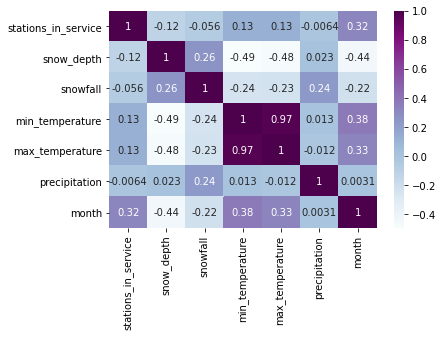

In [16]:
vars_3a=["stations_in_service","snow_depth","snowfall","min_temperature","max_temperature","precipitation","month"]
sub_bikes = bikes_weekdays[vars_3a]

sns.heatmap(sub_bikes.corr(), annot=True, cmap="BuPu")
plt.show()

--> min temp and max temp are highly corelated

**4)b) Are any of the predictors highly correlated? Are you surprised that these predictors are highly correlated, or can you think of a reason for why it makes sense that they should be correlated?** [1pt]

In [26]:
weekday[predictors_correlated].corr()

,snow_depth,snowfall,min_temperature,max_temperature,precipitation,month,stations_in_service
snow_depth,1.000000,0.261811,-0.493187,-0.475653,0.022949,-0.439442,-0.118428
snowfall,0.261811,1.000000,-0.237841,-0.232368,0.237246,-0.215126,-0.056237
min_temperature,-0.493187,-0.237841,1.000000,0.968400,0.013444,0.381236,0.128946
max_temperature,-0.475653,-0.232368,0.968400,1.000000,-0.011895,0.329866,0.129106
precipitation,0.022949,0.237246,0.013444,-0.011895,1.000000,0.003059,-0.006357
month,-0.439442,-0.215126,0.381236,0.329866,0.003059,1.000000,0.318325
stations_in_service,-0.118428,-0.056237,0.128946,0.129106,-0.006357,0.318325,1.000000


--> As expected, we can see that min_temperature and max_temperature are highly correlated to each other (0.97). They’re essentially collinear variables. This makes logical sense, as the they are both calculated from daily temperature. They are simply the highest and lowest temperature of the day. You could say we are incorparating temperature twice in our model.



**4) c) Fit your regression model, but this time omit the max or min temperature variable. Display the coefficients table for this model.** [2pt]

In [17]:
#It makes sense to remove min_temperature as it wasn't statistically significant in the previous model.
reg_multi_weekdays = smf.ols('trips ~ stations_in_service + snow_depth + snowfall + max_temperature + precipitation + month', bikes_weekdays).fit()
reg_multi_weekdays.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     544.7
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          3.09e-239
Time:                        14:38:00   Log-Likelihood:                -6020.6
No. Observations:                 608   AIC:                         1.206e+04
Df Residuals:                     601   BIC:                         1.209e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.155e+04   1773.872    -17.785      0.000    -3.5e+04   -2.81e+04
stations_in_service    85.3023      4.963     17.186      0.000      75.554      95.050
snow_depth           -328.3297     78.248     -4.196      0.000    -482.003    -174.657
snowfall             -133.6045    238.774     -0.560      0.576    -602.538     335.329
max_temperature       442.7014     11.733     37.732      0.000     419.659     465.744
precipitation       -8131.8084    536.140    -15.167      0.000   -9184.743   -7078.873
month                 313.3630     68.934      4.546      0.000     177.982     448.744
==============================================================================
Omnibus:                      104.917   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.391
Skew:                          -0.825   Prob(JB):                     1.98e-69
Kurtosis:                       6.125   Cond. No.                     3.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**4)d) What is the coefficient of temperature in this new model? Is it very different from the temperature coefficient estimated in part 3)a)? Is it statistically significant? Explain your findings.** [2pt]

In [28]:
model_5.params

Intercept         -5144.346532
snow_depth         -279.179971
snowfall            -69.512964
precipitation     -8241.037302
max_temperature     451.054381
month               657.282601
dtype: float64

The coeficient for max_temperature in this model is 442 (1F increase in max_temperature is associated with a 442 increase in daily bike trips). The coefficient for the previous mdoel was 409. This result has a p-value below 0.05 and it is statistically significant.



## Problem 5: Exploring different models [19 pts]

*Continue using weekdays as your dataset.*

**5)a) Construct a scatterplot of trips ~ month. Describe what you see. Does a linear relationship appear to be a good way of modeling how bikeshare count varies with month?** [2pts]

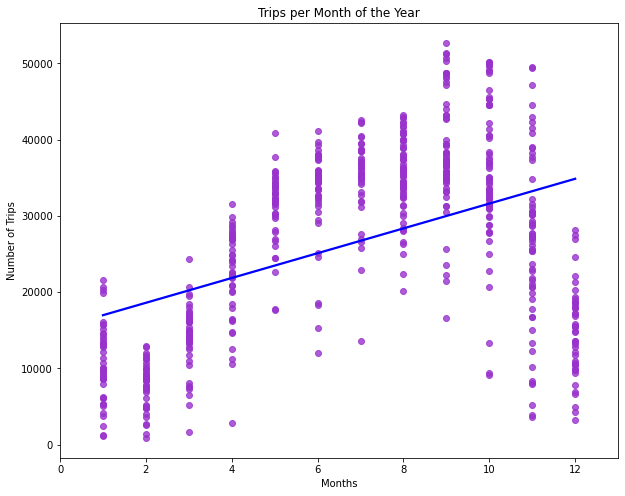

In [18]:
plt.figure(figsize=(10,8))
sns.regplot(x="month",y="trips",data=bikes_weekdays, ci=None, order=1, 
            scatter_kws={"color": "darkorchid"}, 
            line_kws={"color": "blue"}).set(title='Trips per Month of the Year',
                                            xlabel='Months',
                                            ylabel = 'Number of Trips',
                                            xlim = (0,13))
plt.show()

<AxesSubplot:xlabel='month', ylabel='trips'>

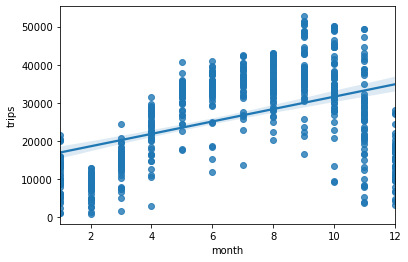

In [30]:
sns.regplot(data = weekday, x = 'month', y = 'trips')

--> Linear model does not seem like a good way of modeling the relationship since we can see that the relationship between months and trips is non-linear

**5)b) Try out six different degrees of polynomial regression fits for modeling the relationship between trips and month. Do not do more than six models. Display all of them in the same plot (through subplots). Choose the subplot that appears to nicely capture the trends in the data. Be sure to print the $R^2$ or adjusted-$R^2$ for each subplot to help you with your decision. Explain your choice and include comments to explain your code.** [8pts]

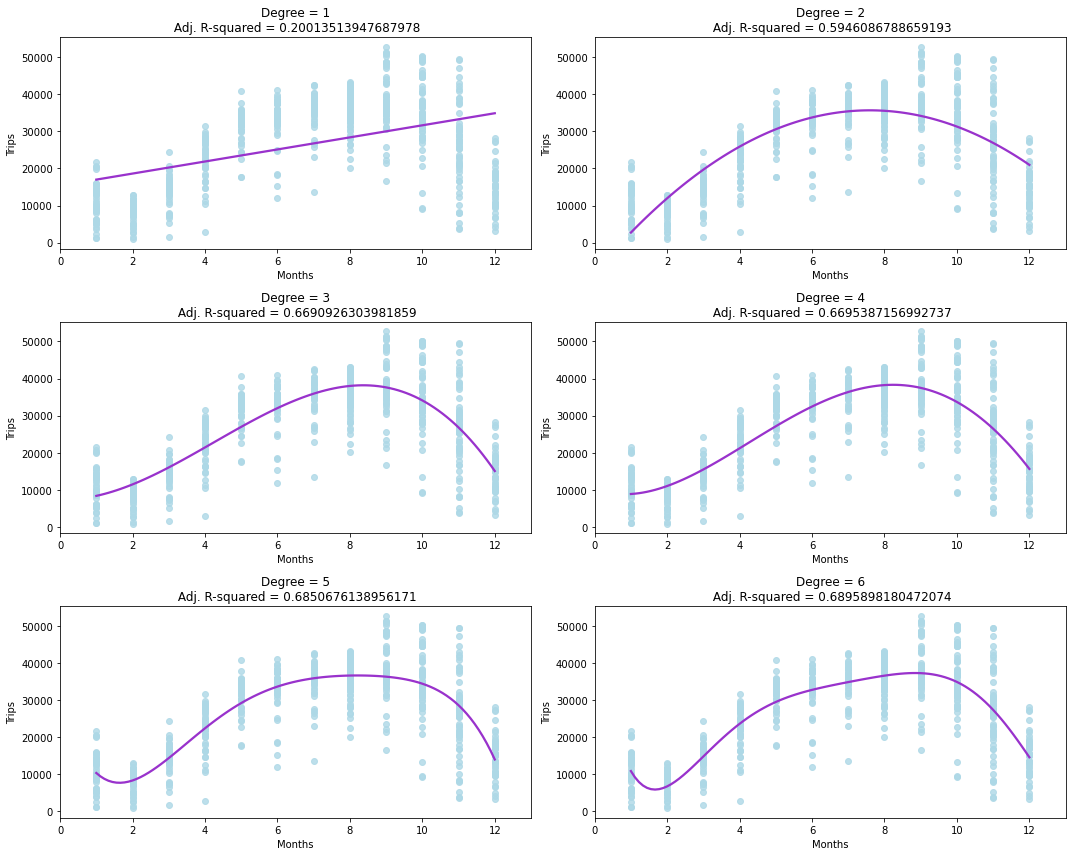

In [20]:
#we can plot degrees 1 to 6
x = bikes_weekdays["month"] 
y = bikes_weekdays["trips"]
degrees=[1,2,3,4,5,6]
plt.figure(figsize=(15,12))
for j in range(len(degrees)):
    polynomial_features= PolynomialFeatures(degree=degrees[j])
    xp = polynomial_features.fit_transform(x.values.reshape(-1, 1))
    model = sm.OLS(y, xp).fit()
    predicted_vals = model.predict()
    ax = plt.subplot(3, 2, j + 1)
    sns.regplot(x="month",y="trips",data=bikes_weekdays, ci=None, label=('Degree '+str(degrees[j])), order=degrees[j], 
            scatter_kws={"color": "lightblue"}, line_kws={"color": "darkorchid"},ax=ax)
    ax.set_title("Degree = "+str(degrees[j])+"\n Adj. R-squared = "+str(model.rsquared_adj))
    ax.set_xlim(0,13)
    ax.set_xlabel('Months')
    ax.set_ylabel('Trips')
plt.tight_layout()
plt.show()

--> The plot with 6 degree provides the most best fitted result. It has the higest R Square of 0.693

**5)c) Repeat 5)b) to determine appropriate degree polynomials for modeling the relationship between trip and the other inputs: temperature (pick one), snow (also pick one) and precipitation (i.e., trips ~ temperature, trips ~ snow, and trips ~precipitation). Justify your choices and include comment on your code. (Note: your polynomials can have different degrees for different features)** [4pts]


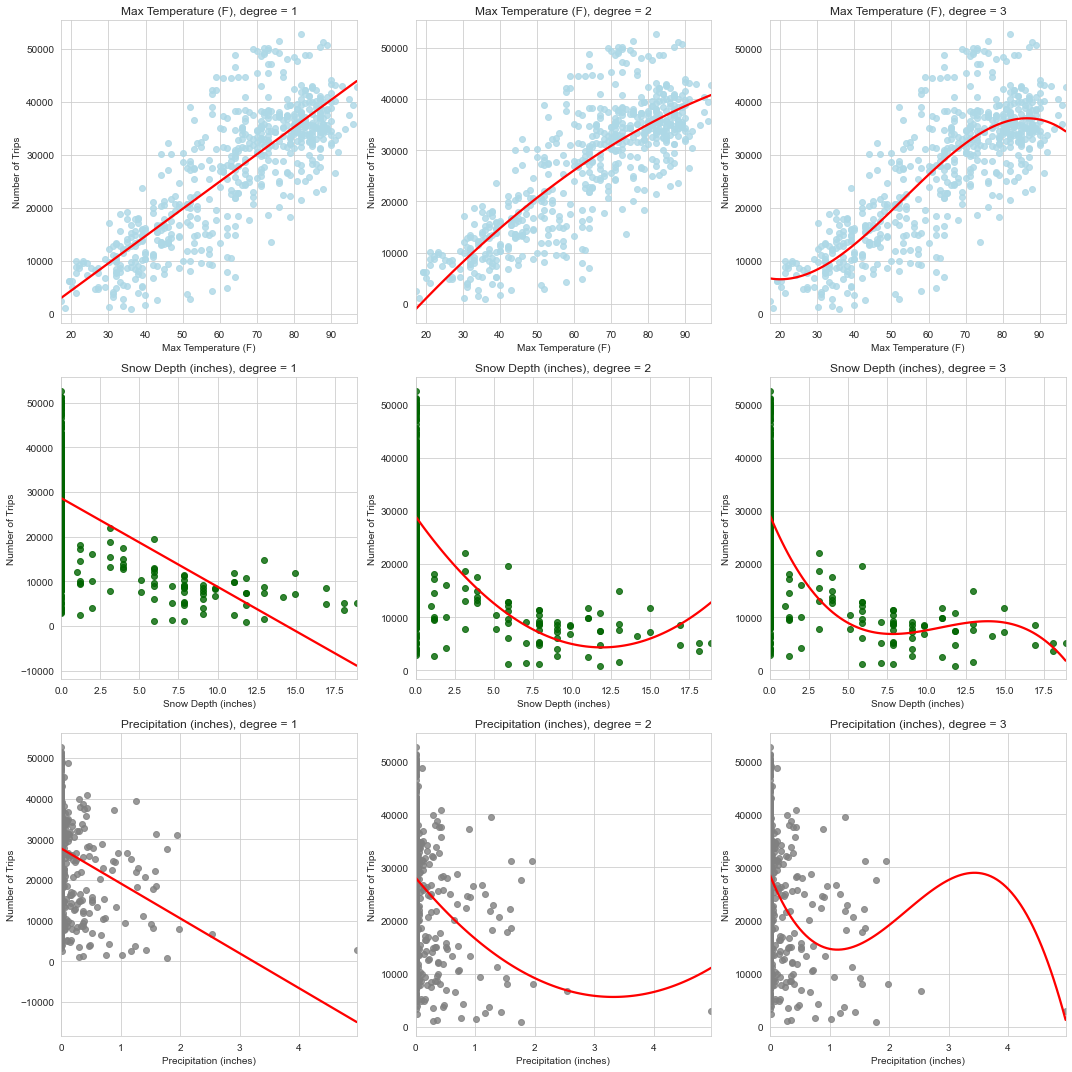

In [21]:
subplot_num=1
degree=[1,2,3]
predictors = ["max_temperature","snow_depth","precipitation"]
labels_x= ["Max Temperature (F)","Snow Depth (inches)","Precipitation (inches)"]
colors_sc = ["lightblue","darkgreen","grey"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
for j in range(len(predictors)):
    for i in range(len(degree)):
        ax = plt.subplot(3, 3, subplot_num )
        reg_atemp = sns.regplot(x=predictors[j],y="trips",data=bikes_weekdays, ci=None, order=degree[i], 
                                scatter_kws={"color": colors_sc[j]}, 
                                line_kws={"color": "red"}, ax=ax)
        reg_atemp.set(xlabel=labels_x[j], ylabel='Number of Trips')
        reg_atemp.set(title=(labels_x[j]+", degree = "+str(degree[i])))
        subplot_num+=1
plt.tight_layout()
plt.show()

--> The plots above show the linear fit for each variable, along with a reasonable polynomial fit (degree=2 and degree=3). As in part (b), a visual inspection suggests that several choice of polynomial fit may be reasonable

Max Temperature

Max_temperature: We settled on a degree-3 polynomial. The linear fit did not do a good job of capturing the relationship between ridership and temperature in the high temperature ranges. While it’s true that warmer temperatures tend to be associated with increased ridership, we can clearly see that ridership falls off when we hit really hot temperatures.

Snow Depth

A degree-3 polynomial appears to do a decent job here. The model has problem with the days where there is no snow. Maybe if we removed these values or did a model for only snowy days, the linear model would look better also.

Precipitation

All the models don't seem to capture the relationship between precipitation and number of trips. For this case, the least worst is the polynomial degree 2.

Note: this is based on visual inspection. Further on we should use metrics to justify our answers.

**5)d) Repeat 5)c) with the weekends dataset. Do you notice any differences with 5)c)? Justify your choices and include comment on your code.** [5pts]

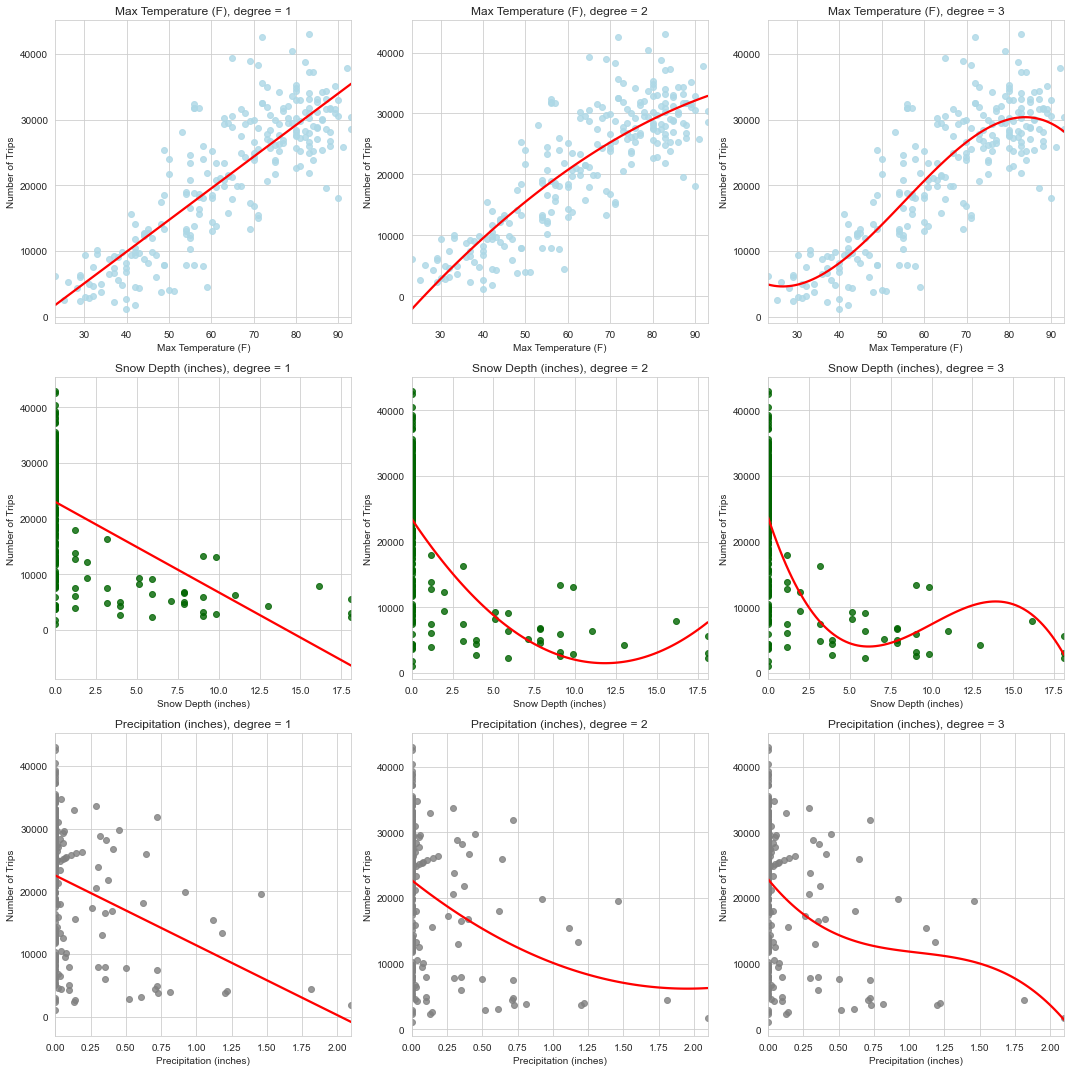

In [22]:
subplot_num=1
degree=[1,2,3]
predictors = ["max_temperature","snow_depth","precipitation"]
labels_x= ["Max Temperature (F)","Snow Depth (inches)","Precipitation (inches)"]
colors_sc = ["lightblue","darkgreen","grey"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
for j in range(len(predictors)):
    for i in range(len(degree)):
        ax = plt.subplot(3, 3, subplot_num )
        reg_atemp = sns.regplot(x=predictors[j],y="trips",data=bikes_weekends, ci=None, order=degree[i], 
                                scatter_kws={"color": colors_sc[j]}, 
                                line_kws={"color": "red"}, ax=ax)
        reg_atemp.set(xlabel=labels_x[j], ylabel='Number of Trips')
        reg_atemp.set(title=(labels_x[j]+", degree = "+str(degree[i])))
        subplot_num+=1
plt.tight_layout()
plt.show()

--> Compared to weekday

1)max temp:  R squared of weekend is higher 
2)snowfall: R squared about the same for both
3)precipitation: R squared of weekend is higher 

---